In [100]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import svm
from matplotlib import pyplot as plt



Read the concatenated CSV

In [101]:
path = "../preprocessing/concat.csv"
df = pd.read_csv(path)

/tmp/ipykernel_14937/2773897866.py:2: DtypeWarning:

Columns (721) have mixed types. Specify dtype option on import or set low_memory=False.



In [102]:
df

,Unnamed: 0,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,...,AU45_c,video_id,file,mix,emotion_1,vocalization,intensity_level,emotion_2,proportions,situation
0,0,1,0,0.00,0.98,1,-0.062394,0.301228,-0.951509,-0.192912,...,1.0,A220,A220_reg_p_2.csv,False,reg,p,2,NaN,NaN,NaN
1,1,2,0,0.02,0.98,1,-0.052638,0.300214,-0.952418,-0.205766,...,0.0,A220,A220_reg_p_2.csv,False,reg,p,2,NaN,NaN,NaN
2,2,3,0,0.04,0.98,1,-0.050868,0.293366,-0.954646,-0.208241,...,0.0,A220,A220_reg_p_2.csv,False,reg,p,2,NaN,NaN,NaN
3,3,4,0,0.06,0.98,1,-0.053854,0.298332,-0.952942,-0.204404,...,0.0,A220,A220_reg_p_2.csv,False,reg,p,2,NaN,NaN,NaN
4,4,5,0,0.08,0.98,1,-0.049128,0.298474,-0.953153,-0.201120,...,0.0,A220,A220_reg_p_2.csv,False,reg,p,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110583,305,306,0,6.10,0.98,1,0.085220,0.297743,-0.950835,-0.092437,...,0.0,A220,A220_anx_v_3.csv,False,anx,v,3,NaN,NaN,NaN
110584,306,307,0,6.12,0.98,1,0.081289,0.296204,-0.951659,-0.078804,...,0.0,A220,A220_anx_v_3.csv,False,anx,v,3,NaN,NaN,NaN
110585,307,308,0,6.14,0.98,1,0.079877,0.291925,-0.953100,-0.080352,...,0.0,A220,A220_anx_v_3.csv,False,anx,v,3,NaN,NaN,NaN
110586,308,309,0,6.16,0.93,1,0.083870,0.294762,-0.951883,-0.083980,...,0.0,A220,A220_anx_v_3.csv,False,anx,v,3,NaN,NaN,NaN


Drop mized emotions, get rid of all columns except action units, emotion and filename

In [103]:
df_tmp = df[df['mix'] == False]
df_tmp = df_tmp.loc[:, df_tmp.columns.str.startswith(('AU', "emotion_1", "file"))]

Group by filename, calculate mean value

In [104]:
df_tmp = df_tmp.groupby('file').mean()

Create metadata dataframe

In [105]:
metadata_df = df[['file','emotion_1']].drop_duplicates()

Merge metadata (emotion) with action units means and filename

In [106]:
df_tmp = pd.merge(df_tmp, metadata_df, on='file')

In [107]:
df_tmp

,file,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,...,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,emotion_1
0,A220_adm_p_1.csv,0.097253,0.058352,0.020824,0.030000,0.574670,0.113462,0.034890,2.372967,1.469725,...,0.956044,0.000000,0.307692,0.192308,0.016484,0.219780,0.093407,0.000000,0.247253,adm
1,A220_adm_p_2.csv,0.148299,0.079004,0.006763,0.054066,0.459793,0.094274,0.051867,2.065643,1.334938,...,0.970954,0.124481,0.307054,0.182573,0.000000,0.307054,0.024896,0.000000,0.219917,adm
2,A220_adm_p_3.csv,0.225489,0.082809,0.048511,0.034936,0.721149,0.303872,0.065404,2.272340,1.617957,...,0.982979,0.038298,0.297872,0.123404,0.000000,0.110638,0.200000,0.000000,0.289362,adm
3,A220_adm_p_4.csv,0.161825,0.046958,0.005095,0.035551,0.831939,0.366654,0.029848,2.274411,1.814905,...,0.984791,0.026616,0.266160,0.000000,0.000000,0.015209,0.019011,0.000000,0.209125,adm
4,A220_adm_v_1.csv,0.079172,0.057239,0.075828,0.028466,0.429847,0.329417,0.041166,2.196933,1.078374,...,1.000000,0.000000,0.153374,0.027607,0.000000,0.052147,0.248466,0.000000,0.226994,adm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,A220_tri_p_4.csv,0.175213,0.081738,0.007943,0.073156,1.182518,0.815319,0.084752,2.057553,2.452589,...,0.726950,0.535461,0.294326,0.127660,0.248227,0.166667,0.280142,0.031915,0.209220,tri
348,A220_tri_v_1.csv,0.097328,0.043190,0.308621,0.035086,1.275431,0.193190,0.020000,2.703103,1.601810,...,1.000000,0.025862,0.396552,0.000000,0.068966,0.422414,0.353448,0.000000,0.025862,tri
349,A220_tri_v_2.csv,0.071863,0.043043,0.127267,0.021304,1.569752,0.399814,0.024099,2.380435,2.086957,...,1.000000,0.136646,0.080745,0.136646,0.000000,0.155280,0.161491,0.000000,0.149068,tri
350,A220_tri_v_3.csv,0.131946,0.039732,0.745503,0.032349,1.999799,1.060537,0.338792,2.683221,2.183490,...,1.000000,0.463087,0.295302,0.281879,0.395973,0.234899,0.228188,0.000000,0.241611,tri


Convert everything to numpy

In [108]:
# Convert your data frame's columns into arrays
x = df_tmp.loc[:, df_tmp.columns.str.startswith(('AU'))].to_numpy()
x

array([[0.09725275, 0.05835165, 0.02082418, ..., 0.09340659, 0.        ,
        0.24725275],
       [0.14829876, 0.07900415, 0.00676349, ..., 0.02489627, 0.        ,
        0.21991701],
       [0.22548936, 0.08280851, 0.04851064, ..., 0.2       , 0.        ,
        0.2893617 ],
       ...,
       [0.07186335, 0.04304348, 0.12726708, ..., 0.16149068, 0.        ,
        0.14906832],
       [0.13194631, 0.03973154, 0.74550336, ..., 0.22818792, 0.        ,
        0.24161074],
       [1.09315113, 0.36688103, 0.06987138, ..., 0.37299035, 0.        ,
        0.22508039]])

In [146]:
x.shape

(352, 35)

In [110]:
y = df_tmp['emotion_1'].to_numpy()
y

array(['adm', 'adm', 'adm', 'adm', 'adm', 'adm', 'adm', 'adm', 'amu',
       'amu', 'amu', 'amu', 'amu', 'amu', 'amu', 'amu', 'ang', 'ang',
       'ang', 'ang', 'ang', 'ang', 'ang', 'ang', 'anx', 'anx', 'anx',
       'anx', 'anx', 'anx', 'anx', 'anx', 'awe', 'awe', 'awe', 'awe',
       'awe', 'awe', 'awe', 'awe', 'bor', 'bor', 'bor', 'bor', 'bor',
       'bor', 'bor', 'bor', 'conc', 'conc', 'conc', 'conc', 'conc',
       'conc', 'conc', 'conc', 'conf', 'conf', 'conf', 'conf', 'conf',
       'conf', 'conf', 'conf', 'cont', 'cont', 'cont', 'cont', 'cont',
       'cont', 'cont', 'cont', 'det', 'det', 'det', 'det', 'det', 'det',
       'det', 'det', 'disa', 'disa', 'disa', 'disa', 'disa', 'disa',
       'disa', 'disa', 'disg', 'disg', 'disg', 'disg', 'disg', 'disg',
       'disg', 'disg', 'dist', 'dist', 'dist', 'dist', 'dist', 'dist',
       'dist', 'dist', 'dou', 'dou', 'dou', 'dou', 'dou', 'dou', 'dou',
       'dou', 'ele', 'ele', 'ele', 'ele', 'ele', 'ele', 'ele', 'ele',
       'emb', 

In [147]:
y.shape

(352,)

Split into training and test sets

In [152]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [148]:
# feed into your classifier 
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC()

Lets look at the predictions...

In [114]:
clf.predict(x_test)

array(['disg', 'awe', 'fea', 'conf', 'pri', 'dist', 'pri', 'cont', 'bor',
       'sex', 'neg_sur', 'bor', 'hap', 'adm', 'sex', 'bor', 'hop', 'bor',
       'bor', 'sex', 'neu', 'pos_sur', 'dist', 'adm', 'fea', 'sex', 'sex',
       'hap', 'adm', 'sex', 'ins', 'bor', 'pri', 'fea', 'neg_sur', 'ins',
       'sex', 'awe', 'pri', 'pri', 'hap', 'fea', 'hap', 'adm', 'adm',
       'adm', 'fea', 'pri', 'scha', 'neu', 'gra', 'neu', 'adm', 'dist',
       'hap', 'neg_sur', 'env', 'env', 'tri', 'bor', 'adm', 'adm', 'nos',
       'pos_sur', 'adm', 'dist', 'pos_sur', 'hap', 'pos_sur', 'scha',
       'dou'], dtype=object)

In [115]:
y_test

array(['disg', 'ple', 'disa', 'conf', 'ten', 'dist', 'nos', 'cont', 'rel',
       'anx', 'neg_sur', 'pea', 'amu', 'tri', 'reg', 'pea', 'emb', 'rel',
       'rel', 'anx', 'bor', 'int', 'reg', 'exc', 'sad', 'rej', 'rej',
       'mov', 'exc', 'sha', 'gra', 'pea', 'ple', 'disa', 'cont', 'ins',
       'sha', 'ple', 'ple', 'pri', 'amu', 'gui', 'sat', 'ple', 'tri',
       'exc', 'sha', 'sat', 'mov', 'awe', 'hop', 'reg', 'mov', 'anx',
       'amu', 'neg_sur', 'env', 'disg', 'tri', 'bor', 'ele', 'adm', 'sar',
       'int', 'int', 'sha', 'sar', 'hap', 'pos_sur', 'scha', 'emb'],
      dtype=object)

Look at the total score, not very good...

In [116]:
clf.score(x_test, y_test)

0.2112676056338028

Lets try with some other kernels...

In [117]:
# polynomial kernel
clf = svm.SVC(kernel = "poly")
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.2535211267605634

In [118]:
# rbf
clf = svm.SVC(kernel = "rbf")
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.2112676056338028

In [153]:
# linear
clf = svm.SVC(kernel = "linear")
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.39436619718309857

In [150]:
clf.predict(x_test)

array(['disg', 'ten', 'disa', 'conf', 'pri', 'dist', 'ten', 'det', 'rel',
       'anx', 'neg_sur', 'bor', 'amu', 'tri', 'gui', 'bor', 'hop', 'rel',
       'bor', 'rej', 'dou', 'pos_sur', 'reg', 'pos_sur', 'fea', 'anx',
       'rej', 'hap', 'exc', 'sex', 'ins', 'bor', 'pri', 'fea', 'env',
       'ins', 'fea', 'awe', 'pri', 'ten', 'amu', 'sad', 'mov', 'awe',
       'tri', 'adm', 'sad', 'pri', 'dou', 'awe', 'gra', 'anx', 'nos',
       'rej', 'amu', 'neg_sur', 'env', 'disg', 'sar', 'bor', 'adm', 'adm',
       'nos', 'pos_sur', 'adm', 'dist', 'sex', 'amu', 'pos_sur', 'scha',
       'dou'], dtype=object)

In [151]:
y_test

array(['disg', 'ple', 'disa', 'conf', 'ten', 'dist', 'nos', 'cont', 'rel',
       'anx', 'neg_sur', 'pea', 'amu', 'tri', 'reg', 'pea', 'emb', 'rel',
       'rel', 'anx', 'bor', 'int', 'reg', 'exc', 'sad', 'rej', 'rej',
       'mov', 'exc', 'sha', 'gra', 'pea', 'ple', 'disa', 'cont', 'ins',
       'sha', 'ple', 'ple', 'pri', 'amu', 'gui', 'sat', 'ple', 'tri',
       'exc', 'sha', 'sat', 'mov', 'awe', 'hop', 'reg', 'mov', 'anx',
       'amu', 'neg_sur', 'env', 'disg', 'tri', 'bor', 'ele', 'adm', 'sar',
       'int', 'int', 'sha', 'sar', 'hap', 'pos_sur', 'scha', 'emb'],
      dtype=object)

In [138]:
df.columns.values

array(['Unnamed: 0', 'frame', 'face_id', 'timestamp', 'confidence',
       'success', 'gaze_0_x', 'gaze_0_y', 'gaze_0_z', 'gaze_1_x',
       'gaze_1_y', 'gaze_1_z', 'gaze_angle_x', 'gaze_angle_y',
       'eye_lmk_x_0', 'eye_lmk_x_1', 'eye_lmk_x_2', 'eye_lmk_x_3',
       'eye_lmk_x_4', 'eye_lmk_x_5', 'eye_lmk_x_6', 'eye_lmk_x_7',
       'eye_lmk_x_8', 'eye_lmk_x_9', 'eye_lmk_x_10', 'eye_lmk_x_11',
       'eye_lmk_x_12', 'eye_lmk_x_13', 'eye_lmk_x_14', 'eye_lmk_x_15',
       'eye_lmk_x_16', 'eye_lmk_x_17', 'eye_lmk_x_18', 'eye_lmk_x_19',
       'eye_lmk_x_20', 'eye_lmk_x_21', 'eye_lmk_x_22', 'eye_lmk_x_23',
       'eye_lmk_x_24', 'eye_lmk_x_25', 'eye_lmk_x_26', 'eye_lmk_x_27',
       'eye_lmk_x_28', 'eye_lmk_x_29', 'eye_lmk_x_30', 'eye_lmk_x_31',
       'eye_lmk_x_32', 'eye_lmk_x_33', 'eye_lmk_x_34', 'eye_lmk_x_35',
       'eye_lmk_x_36', 'eye_lmk_x_37', 'eye_lmk_x_38', 'eye_lmk_x_39',
       'eye_lmk_x_40', 'eye_lmk_x_41', 'eye_lmk_x_42', 'eye_lmk_x_43',
       'eye_lmk_x_44', 'eye_lmk_

In [139]:
feature_names = ['AU01_r', 'AU02_r', 'AU04_r', 'AU05_r',
       'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r', 'AU12_r', 'AU14_r',
       'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r',
       'AU45_r', 'AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c',
       'AU07_c', 'AU09_c', 'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c',
       'AU17_c', 'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 'AU28_c',
       'AU45_c']

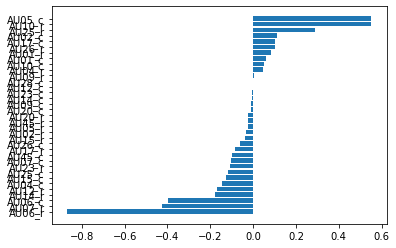

In [140]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

f_importances(clf.coef_[0], feature_names)

In [154]:
clf.coef_.shape

(946, 35)

In [ ]:
# sigmoid
clf = svm.SVC(kernel = "sigmoid")
clf.fit(x_train, y_train)
clf.score(x_test, y_test)